# Exercice 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import random_sample 
from scipy.stats import norm 

## Question 3 : 


In [2]:
# Calcul Proba Conditionnelle 
def probaCond_notation(k, n0, X, rho) : 
    M = np.matrix('0.7, 0.2, 0.05, 0.05; 0.15, 0.65, 0.1, 0.1; 0.05, 0.05, 0.7, 0.2; 0, 0, 0, 1')
    #Matrice de transition cumulée 
    C = np.cumsum(M, 1)
    if k == 0 : 
        c = 0
    elif (set([k, n0]).issubset(set([0, 1, 2, 3]))) : 
        c = C[n0, k-1]
    else : 
        return 0 
    a = (norm.ppf(C[n0, k]) + np.sqrt(rho)*X)/np.sqrt(1-rho)
    b = (norm.ppf(c) + np.sqrt(rho)*X)/np.sqrt(1-rho)
    return norm.cdf(a) - norm.cdf(b)

In [4]:
# Simulateur de l'ensemble des notes de toutes les entreprises 
def rv_note_cond (loi_n0, X, rho, N):
    sample = np.zeros(N)
    support = np.array([0, 1, 2, 3]) # Le support de la note aleatoire n_i
    
    if loi_n0 in [0, 1, 2, 3] :
        probabilites = [probaCond_notation(k, loi_n0, X, rho) for k in range(4)] 
        sample = support[np.digitize(random_sample(N), np.cumsum(probabilites))]
        
       
    elif (callable(loi_n0)) and (loi_n0(1) in [0, 1, 2, 3]) :  
        Mat_proba = np.matrix(np.reshape([probaCond_notation(k, j, X, rho) for k in range(4) for j in range(3) ], (4,3))) 
        n0 = loi_n0(N)
        u = random_sample(N)

        sample[np.where(n0 == 0)[0]] = support[np.digitize(u[np.where(n0 == 0)[0]], np.cumsum([Mat_proba[:,0]]))]
        sample[np.where(n0  == 1)[0]] = support[np.digitize(u[np.where(n0  == 1)[0]], np.cumsum([Mat_proba[:,1]]))]
        sample[np.where(n0  == 2)[0]] = support[np.digitize(u[np.where(n0  == 2)[0]], np.cumsum([Mat_proba[:,2]]))]
        
    else : 
        print('Loi note initiale inappropriée ou arguments incompatible')
        
    return sample

In [26]:
#---Histogramme des réalisation pour n0 et X fixés
def hist_note_UnAn(n0, rho, N):
    x = np.random.normal()
    Y = rv_note_cond (n0, x, rho, N)
    Y = pd.DataFrame(Y)
    a = Y.value_counts(sort=False)
    a = a/len(500)
    a.plot.bar(rot=1)
    plt.title('Notes un an')
    plt.xlabel('notes')
    plt.ylabel('Probabilités')
    plt.show()

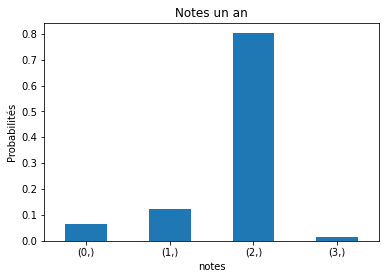

In [27]:
n0, rho = 2,.5
N = 500
hist_note_UnAn(n0, rho, N)

In [20]:
# Simulateur de la perte à un an 
def simu_perte(loi_n0, rho, N, Nmc):
    X = np.random.normal(size = Nmc)
    E = np.random.lognormal(size=(Nmc,N)) 
    Mat_notes = np.matrix(np.reshape([rv_note_cond (loi_n0, X[k], rho, N) for k in range(Nmc)], (Nmc,N))) 
    Mat_1_0 = np.multiply(Mat_notes==np.full((Nmc, N), 3), 1)
    Product = np.mat(np.array(E) * np.array(Mat_1_0)) # Produit termes à termes 
    
    return np.concatenate(np.sum(Product,axis=1).tolist())

C:\Users\ckamgata\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

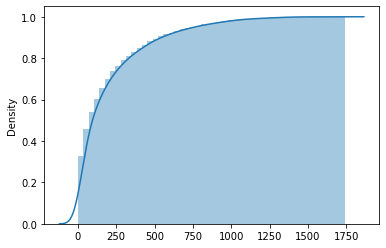

In [31]:
# fonction de répartition de la perte à un an 
import seaborn as sns  
x = simu_perte(loi_n0, rho, N, Nmc)
kwargs = {'cumulative': True} 
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

In [21]:
# fonction quantile
def quantile_L(alpha, loi_n0, rho, N, Nmc): 
    data = simu_perte(loi_n0, rho, N, Nmc)
    return np.quantile(data, alpha)

In [22]:
# simulateur de loi uniforme discrete
def Uniforme_discrete(N): 
    return np.random.randint(0, high = 3, size = N)

In [28]:
# conditions initiales 
alpha, rho = 0.65, 0.5
loi_n0 = Uniforme_discrete 
N, Nmc = 1000, 10000

In [29]:
# Calcule du quantile d'ordre alpha = 0.65
quantile_L(alpha, loi_n0, rho, N, Nmc)

175.2178524758051